In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [83]:
db=pd.read_csv('diffData.csv')
db

,Sno,time,distance,Diffusion
0,1,456.441718,0.006426,Dgb
1,2,598.773006,0.000728,Db
2,3,181.595092,0.000401,Db
3,4,265.030675,0.000484,Db
4,5,476.073620,0.006563,Dgb
...,...,...,...,...
975,976,149.693252,0.003680,Dgb
976,977,488.343558,0.000657,Db
977,978,354.601227,0.000560,Db
978,979,112.883436,0.003196,Dgb


In [84]:
db1=db[db['Diffusion']=='Dgb']
db1

,Sno,time,distance,Diffusion
0,1,456.441718,0.006426,Dgb
4,5,476.073620,0.006563,Dgb
5,6,392.638037,0.005960,Dgb
6,7,80.981595,0.002707,Dgb
7,8,255.214724,0.004805,Dgb
...,...,...,...,...
973,974,272.392638,0.004964,Dgb
974,975,235.582822,0.004617,Dgb
975,976,149.693252,0.003680,Dgb
978,979,112.883436,0.003196,Dgb


In [85]:
db2=db[db['Diffusion']=='Db']
db2

,Sno,time,distance,Diffusion
1,2,598.773006,0.000728,Db
2,3,181.595092,0.000401,Db
3,4,265.030675,0.000484,Db
8,9,320.245399,0.000532,Db
9,10,166.871166,0.000384,Db
...,...,...,...,...
969,970,392.638037,0.000589,Db
970,971,44.171779,0.000198,Db
971,972,541.104295,0.000692,Db
976,977,488.343558,0.000657,Db


In [86]:
Ytarget1=db1['distance']**2
Ytarget1


0      0.000041
4      0.000043
5      0.000036
6      0.000007
7      0.000023
         ...   
973    0.000025
974    0.000021
975    0.000014
978    0.000010
979    0.000038
Name: distance, Length: 490, dtype: float64

In [87]:
Ytarget2=db2['distance']**2
Ytarget2

1      5.294862e-07
2      1.605813e-07
3      2.343625e-07
8      2.831879e-07
9      1.475612e-07
           ...     
969    3.472038e-07
970    3.906038e-08
971    4.784904e-07
976    4.318343e-07
977    3.135686e-07
Name: distance, Length: 490, dtype: float64

In [88]:
Xin1=db1['time']
Xin2=db2['time']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train1, x_test1, y_train1, y_test1 = train_test_split(Xin1,Ytarget1, test_size=0.2, random_state=0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(Xin2,Ytarget2, test_size=0.2, random_state=0)

model1=LinearRegression()
model2=LinearRegression()

x_train1, x_test1, y_train1, y_test1 = train_test_split(Xin1.values.reshape(-1, 1),Ytarget1, test_size=0.2, random_state=0) 
x_train2, x_test2, y_train2, y_test2 = train_test_split(Xin2.values.reshape(-1, 1),Ytarget2, test_size=0.2, random_state=0)

model1.fit(x_train1,y_train1)
model2.fit(x_train2,y_train2)

LinearRegression()

In [89]:
model1.intercept_, model1.coef_,model2.intercept_, model2.coef_

(np.float64(1.578663008693429e-13),
 array([9.04757536e-08]),
 np.float64(2.4408068585553212e-14),
 array([8.84284454e-10]))

In [90]:
predictions1=model1.predict(x_test1)
predictions2=model2.predict(x_test2)


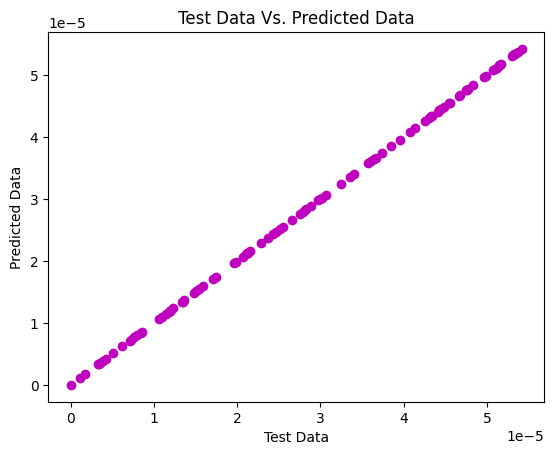

In [91]:
plt.scatter(y_test1, predictions1,color='m')
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.title('Test Data Vs. Predicted Data')
plt.show()

In [92]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y_test1, predictions1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, predictions2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y_test2, predictions2)))

Mean Absolute Error: 2.1382877123191056e-12
Root Mean Squared Error: 2.707825777361423e-12
Mean Absolute Error: 2.803502602091578e-13
Root Mean Squared Error: 6.795596938615882e-13
